In [1]:
# -*- coding: utf-8 -*-

In [2]:
import csv
import string

import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import scipy as sp
import scipy.stats
from scipy.stats import zscore
import statistics
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Data ingestion

In [3]:
df_erp = pd.read_excel('E:\BootCamp\Brief3\Raw\erp.xlsx')
df_liaison = pd.read_excel('E:\BootCamp\Brief3\Raw\liaison.xlsx')
df_cms = pd.read_excel('E:\BootCamp\Brief3\Raw\web.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Amongst the three dataframes, only the "erp" one has no missing values. In "liaison" dataframe, we observed an amount mismatch of "sku" and "product_id" identifiers.

The "cms" dataframe has several empty columns, some "not discriminant" columns (with single value) as well as rows with missing "sku". Almost half of the dataframe has duplicated rows that can be discriminated through 

The columns are as follows: product_id, onsale_web, price, stock_quantity and stock_status

In [4]:
df_erp.info()
print("\n ###################                    ################### \n")
df_liaison.info()
print("\n ###################                    ################### \n")
df_cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB

 ###################                    ################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB

 ###################                    ################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Dat

Check of unique identifiers in "erp" and "liaison" dataframes.

In [5]:
df_erp[df_erp['product_id'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      0 non-null      int64  
 1   onsale_web      0 non-null      int64  
 2   price           0 non-null      float64
 3   stock_quantity  0 non-null      int64  
 4   stock_status    0 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 0.0+ bytes


In [6]:
df_liaison[df_liaison.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  0 non-null      int64 
 1   id_web      0 non-null      object
dtypes: int64(1), object(1)
memory usage: 0.0+ bytes


Check of duplicated rows in "cms" dataframe.

In [7]:
df_cms.describe(include = 'O')

,sku,tax_status,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,guid,post_type,post_mime_type
count,1428,716,1430,716,1430,1430,1430,1430,1430,1430,714
unique,714,1,713,679,1,1,1,716,1430,2,1
top,15360,taxable,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,marcel-windholtz-eau-de-vie-de-kirsch-dalsace-...,https://www.wine-spirit.fr/?post_type=product&...,product,image/jpeg
freq,2,716,4,12,1430,1430,1430,2,1,716,714


In [8]:
df_cms[df_cms['post_title'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 179 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    717 non-null    object        
 1   virtual                799 non-null    int64         
 2   downloadable           799 non-null    int64         
 3   rating_count           799 non-null    int64         
 4   average_rating         717 non-null    float64       
 5   total_sales            717 non-null    float64       
 6   tax_status             3 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            717 non-null    float64       
 9   post_date              717 non-null    datetime64[ns]
 10  post_date_gmt          717 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             717 non-null    object        
 13  po

In [9]:
df_cms[df_cms['sku'].duplicated()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [11]:
df_cms.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Cross-check of "cms" and "erp" identifiers key ('sku', 'id_web') represented in common 'liaison' dataframe, as it has missing values in its id_web column. All those identifiers are integrated in "liaison" dataframe, the merging step will not drop any row.

In [10]:
Df1 = df_erp.assign(result=df_erp['product_id'].isin(df_liaison['product_id']).astype(int))
Df2 = df_cms.assign(result=df_cms['sku'].isin(df_liaison['id_web']).astype(int))

print("There is " + str(Df1[(Df1['result'] != 1)].shape[0]) +" missing product_id in liaison dataframe")
print("There is " + str(Df2[(Df2['result'] != 1)].shape[0]) +" missing sku identifier in liaison dataframe")

There is 0 missing product_id in liaison dataframe
There is 0 missing sku identifier in liaison dataframe


#### Dataframe cleaning

At the first cleaning step, we will remove unsignifiant columns (e.g. the empty ones) of "cms" dataframe. 
Then duplicated "sku" rows will be removed based on discriminant columns (tax_status, 'post_excerpt', 'post_type'). This will also allow us to remove empty rows.

Finally we will remove rows with empty sku, and only keep columns with valuable information.

In [12]:
drop_cms = df_cms.drop(labels=['tax_class', 'post_content', 'post_password', 'post_content_filtered'], 
                     axis=1, inplace=False)

In [13]:
drop_cms = drop_cms[drop_cms.post_excerpt.notnull()].reset_index(drop=True)

We'll have finally a total of 716 rows, amongst them there are two rows with no "sku" value.

In [14]:
drop_cms = drop_cms[drop_cms.sku.notnull()].reset_index(drop=True)

In [15]:
pd.options.display.max_colwidth = 80
drop_cms = drop_cms[['sku', 'total_sales', 'post_title', 'post_excerpt']]
drop_cms

,sku,total_sales,post_title,post_excerpt
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<s..."
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche ..."
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de ...
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digest..."
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche é...
...,...,...,...,...
709,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,"Belle robe jeune à dominante rubis soutenue. Nez fruité, avec des notes de f..."
710,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes et complexes notes de pistach...
711,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un plaisir sur le fruit plus imm..."
712,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche florale et un parfum de vendange ..."


#### Dataframe merging

For the merging step, "web" dataframe iskept as the reference one as we want to define digital sales only. Meanwhile if considering "erp" dataframe as the reference one, additional cleaning process will provide similar output.

In [16]:
df_merge1 = pd.merge(drop_cms, df_liaison[['product_id', 'id_web']], 
                 left_on="sku", right_on="id_web", how="left")

df_merge1 = pd.merge(df_merge1, df_erp[['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status']], 
                 left_on="product_id", right_on="product_id", how="left")

Creation of total_sales (capital) per product

In [17]:
df_merge1['total'] = df_merge1['total_sales']*df_merge1['price']
df_merge1["total_sales"] = df_merge1["total_sales"].apply(lambda x: int(x))

Translation of stock_status column into boolean value (as integer)

In [18]:
numerize = lambda r: 1 if r["stock_status"]=='instock' else 0
df_merge1["stock_status"] = df_merge1.apply(numerize,axis=1)
df_merge1["stock_status"] = df_merge1["stock_status"].astype(int)

Replacement of sku value for row_#712 and removal of row_#0 as it is not a product but a voucher. The total of rows for the cleaned dataframe is 713.

In [19]:
df_merge1 = df_merge1.drop(df_merge1.index[[0]]).reset_index(drop=True)

In [20]:
df_merge1['sku'].replace('13127-1', 99999)
df_merge1

,sku,total_sales,post_title,post_excerpt,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total
0,15298,6,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche ...",3847,15298,1,24.2,0,0,145.2
1,15296,0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de ...,3849,15296,1,34.3,0,0,0.0
2,15300,0,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digest...",3850,15300,1,20.8,0,0,0.0
3,19814,3,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche é...,4032,19814,1,14.1,0,0,42.3
4,19815,0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais garde un milieu de bouche pulp...,4039,19815,1,46.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
708,16135,5,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,"Belle robe jeune à dominante rubis soutenue. Nez fruité, avec des notes de f...",6930,16135,1,8.4,83,1,42.0
709,15891,0,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes et complexes notes de pistach...,7023,15891,1,27.5,15,1,0.0
710,15887,0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un plaisir sur le fruit plus imm...",7025,15887,1,69.0,2,1,0.0
711,13127-1,0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche florale et un parfum de vendange ...",7247,13127-1,1,54.8,23,1,0.0


#### Price distribution per product

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

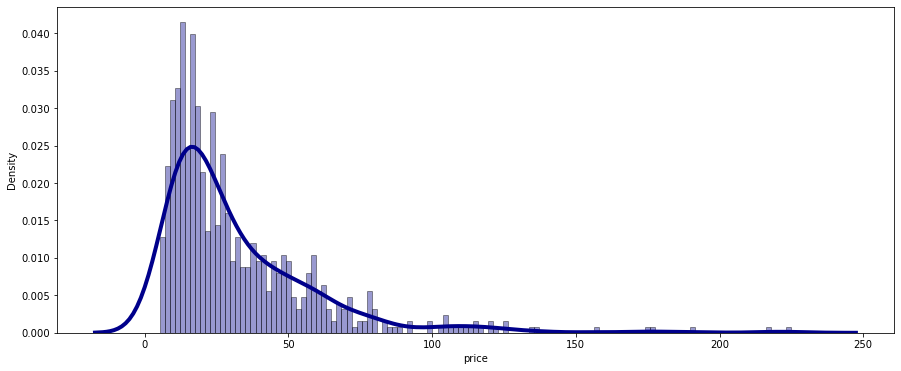

In [21]:
plt.figure(figsize=(15, 6))
sns.distplot(df_merge1["price"], hist=True, kde=True, 
             bins=125, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

As per above figure profil, the price distribution seems to follow a Normal distribution with a skewness of 2.57

In [22]:
from scipy.stats import skew, kurtosis

m_skewness = round(scipy.stats.skew(df_merge1["price"]), 2)
m_kurtosis = round(scipy.stats.kurtosis(df_merge1["price"]), 2)

print("skewness is: " + str(m_skewness))
print("kurtosis is: " + str(m_kurtosis))

skewness is: 2.57
kurtosis is: 9.99


#### Statistics related to Total_CA (capital), Amount of bottle sold, Price and 

In [23]:
null_subset = df_merge1[(df_merge1['total'] > 0)]

Total_CA = null_subset["total"].sum()
Total_sales = int(null_subset["total_sales"].sum())
Mean_sold_price = Total_CA / Total_sales

Mean_price = null_subset["price"].mean()
Min_price = null_subset["price"].min()
Max_price = null_subset["price"].max()

print("Le chiffre d'affaires est de : " + str(Total_CA) + " Euro")
print("Le nombre de bouteilles vendues est de " + str(Total_sales))
print("Le prix moyen des bouteilles vendues est de " + str(round(Mean_sold_price, 2)) + " Euro")
print("")
print("Le prix moyen d'une bouteille est de " + str(round(df_merge1['price'].mean(), 2)) + " Euro")
print("Le prix minimal d'une bouteille est de " + str(df_merge1['price'].min()) + " Euro")
print("Le prix maximal d'une bouteille est de " + str(df_merge1['price'].max()) + " Euro")
print("Le prix median d'une bouteille est de " + str(df_merge1["price"].median()) + " Euro")

Le chiffre d'affaires est de : 70318.6 Euro
Le nombre de bouteilles vendues est de 2855
Le prix moyen des bouteilles vendues est de 24.63 Euro

Le prix moyen d'une bouteille est de 32.5 Euro
Le prix minimal d'une bouteille est de 5.2 Euro
Le prix maximal d'une bouteille est de 225.0 Euro
Le prix median d'une bouteille est de 23.5 Euro


### Outlier identification and analysis

Definition of outlier upperbound with statistical calculus

In [24]:
dev_factor = 2
deviation = statistics.stdev(df_merge1['price'])

outlier_threshold = round(deviation * dev_factor + df_merge1["price"].mean(), 2)
print("The upper threshold for potential outliers identification is " + str(outlier_threshold) + " Euro")

The upper threshold for potential outliers identification is 88.16 Euro


Z-score method

In [25]:
# Normalisation and Overview of the outlier dataframe
df_merge1['zscore-price'] = zscore(df_merge1['price'], ddof=0)
outlier_subset = df_merge1[(df_merge1['zscore-price'] >= dev_factor)]

print("There are " + str(outlier_subset.shape[0]) + " items that are supposed to be outliers")
print("The lower price threshold is " + str(outlier_subset['price'].min()) + " Euro")

There are 30 items that are supposed to be outliers
The lower price threshold is 88.4 Euro


In [26]:
outlier_subset.head()

,sku,total_sales,post_title,post_excerpt,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total,zscore-price
63,15382,0,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,"Le nez est puissant, dominant, riche, sur la fumée et la pierre. Il s’ouvre ...",4115,15382,1,100.0,11,1,0.0,2.427131
65,11668,0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,Le nez dévoile déjà une belle intensité de fruit. Il est facile de ressentir...,4132,11668,1,88.4,5,1,0.0,2.010002
199,15940,5,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du grand cru d’Ambonnay et de 30% ...,4352,15940,1,225.0,0,0,1125.0,6.922062
201,12589,11,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du savoir-faire de la maison Egly-O...,4355,12589,1,126.5,2,1,1391.5,3.380057
218,3510,13,Cognac Frapin VIP XO,"La cuvée VIP XO à été enrichie d’eaux-de-vie très anciennes, allie âge, rond...",4402,3510,1,176.0,8,1,2288.0,5.160049


The potential outliers samples are in fact Premium Wine products, except for some of other samples that are either Cognac, Whisky, Dry Gin or Olive Oil product that cannot be considered as wine products (about 27 items).

In [27]:
df_light = df_merge1[(df_merge1['post_title'].str.contains('Whisky') 
                      | df_merge1['post_title'].str.contains('Dry')
                      | df_merge1['post_title'].str.contains('Cognac')
                      | df_merge1['post_title'].str.contains('Huile'))]

print("There is about " + str(df_light.shape[0]) + " items that are not wine products")

There is about 27 items that are not wine products


<AxesSubplot:>

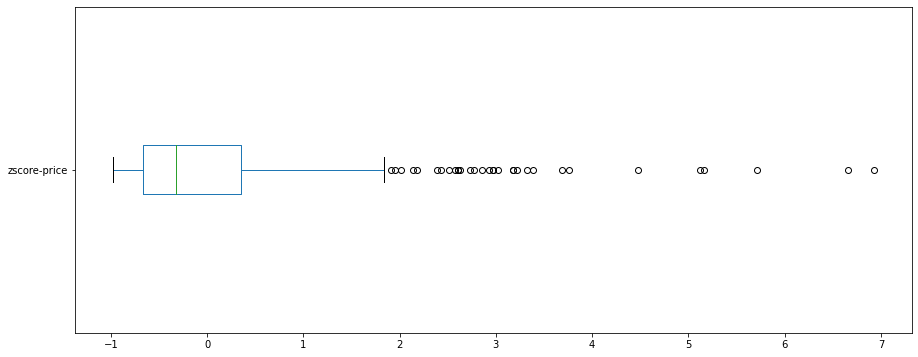

In [28]:
plt.figure(figsize=(15, 6))
df_merge1.boxplot(column =['zscore-price'], grid = False, vert=False)

Outlier detection (IQR method)

In [29]:
quartile = [round(q, 6) for q in statistics.quantiles(df_merge1['price'], n=4)]
Q1 = quartile[0]
Q3 = quartile[2]
IQR = Q3 - Q1

outlier_subset2 = df_merge1[(df_merge1['price'] >= round(Q3 + 1.5 * IQR, 2))]

print("Lower threshold for outliers identification is " + str(round(Q1 - 1.5 * IQR, 2)) + " Euro")
print("Upper threshold for outliers identification is " + str(round(Q3 + 1.5 * IQR, 2)) + " Euro")
print("There is about " + str(outlier_subset2.shape[0]) + " items that are supposed to be outliers")
print("")
print("Median with IQR method is " + str(round(quartile[1], 3)) + " Euro, which is online with our first calculus")

Lower threshold for outliers identification is -28.11 Euro
Upper threshold for outliers identification is 84.39 Euro
There is about 32 items that are supposed to be outliers

Median with IQR method is 23.5 Euro, which is online with our first calculus


Outliers detection (boxplot)

<AxesSubplot:>

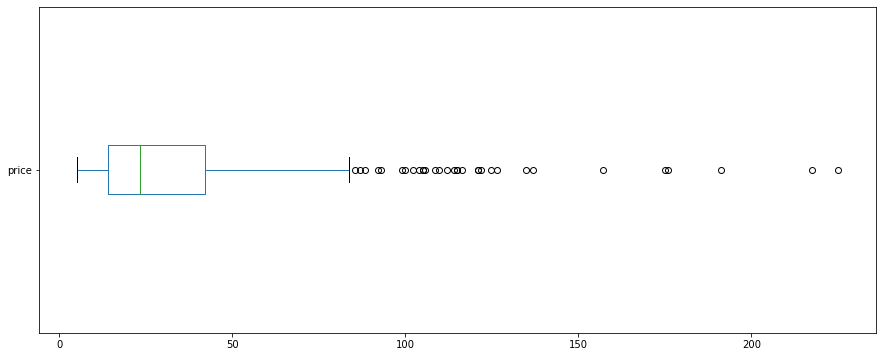

In [30]:
plt.figure(figsize=(15, 6))
df_merge1.boxplot(column =["price"], grid = False, vert=False)

Outliers detection (scatter plot)

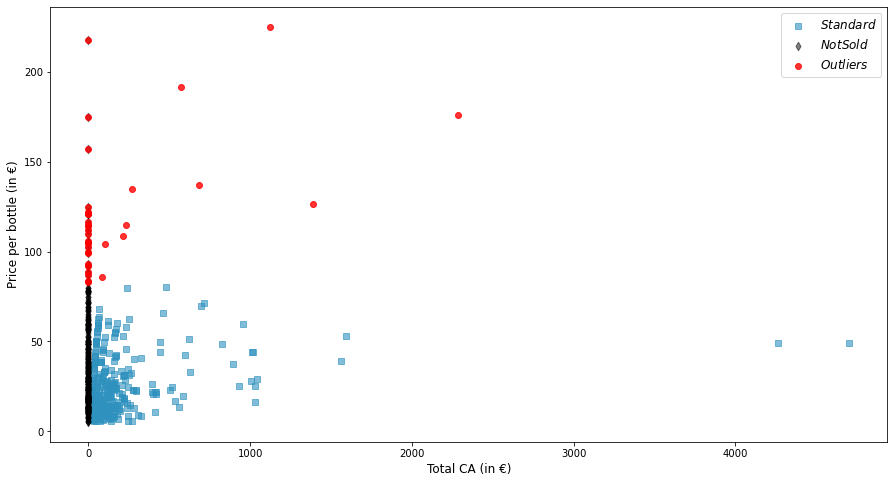

In [31]:
x = df_merge1['total']
y = df_merge1['price']
st_dev = deviation

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

p1 = ax.scatter(x[(np.abs(y) < (Mean_price + 2*st_dev)) & x != 0], y[(np.abs(y) < (Mean_price + 2*st_dev)) & x != 0], 
           marker="s", alpha=0.6, color="#2e91be", label="$Standard$")
p2 = ax.scatter(x[x == 0], y[x == 0], marker="d", alpha=0.5, color="black")
p3 = ax.scatter(x[np.abs(y) >= (Mean_price + 2*st_dev)], y[np.abs(y) >= (Mean_price + 2*st_dev)], 
           marker="o", alpha=0.8, color="red")

ax.legend([p1, p2, p3], ["$Standard$", "$Not Sold$", "$Outliers$"], fontsize = 12)
plt.xlabel("Total CA (in €)", fontsize = 12)
plt.ylabel("Price per bottle (in €)", fontsize = 12)
plt.show()

#### Potential cleaning steps for further study (not_wine/outlier removal)

In [32]:
mask = ['Whisky', 'Dry', 'Cognac', 'Huile']
only_wine = df_merge1[~df_merge1['post_title'].str.contains('|'.join(mask))].reset_index(drop=True)
only_wine = only_wine[['sku', 'total_sales', 'price', 'stock_quantity', 'total', 'stock_status', 'zscore-price']]
only_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             686 non-null    object 
 1   total_sales     686 non-null    int64  
 2   price           686 non-null    float64
 3   stock_quantity  686 non-null    int64  
 4   total           686 non-null    float64
 5   stock_status    686 non-null    int32  
 6   zscore-price    686 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 35.0+ KB


In [33]:
no_outlier = df_merge1[(df_merge1['zscore-price'] <= 2)].reset_index(drop=True)
no_outlier = no_outlier[['sku', 'total_sales', 'price', 'stock_quantity', 'total', 'stock_status']]
no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             683 non-null    object 
 1   total_sales     683 non-null    int64  
 2   price           683 non-null    float64
 3   stock_quantity  683 non-null    int64  
 4   total           683 non-null    float64
 5   stock_status    683 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 29.5+ KB


When removing items that are either not wine product, we have only 20 items that we'll remove as outliers

### K-means clustering

Standardisation and Normalization of the dataframe without outliers

In [34]:
df_price = no_outlier[['price', 'total']]

scaler = StandardScaler()
df_price = pd.DataFrame(scaler.fit_transform(df_price), columns=df_price.columns)

In [35]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 7)
model.fit(df_price)

# Array providing cluster labelling done by K-means transformer (ranging from 0 to 6)
model.labels_

# Array shows how the labels are distributed among samples
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([276, 108,   2,  82,  15, 158,  42], dtype=int64))

The 1st label has highest amount of samples while the 3rd label has lowest amount of samples (most sold items)

In [36]:
# Array shows clusters centroid "coordinates"
centroids = model.cluster_centers_
centroids 

array([[-0.8462355 , -0.16257895],
       [ 0.78943825, -0.2022149 ],
       [ 1.11629546, 14.92581214],
       [ 2.0229647 , -0.18256083],
       [ 0.78370286,  3.06803931],
       [-0.16015426, -0.18227027],
       [-0.21451249,  0.82586289]])

#### Cluster scatter plot with two features

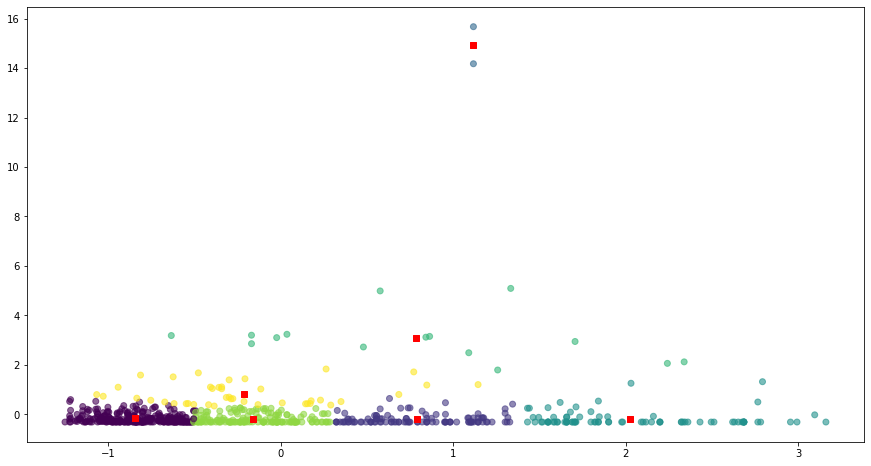

In [37]:
df_kmeans = df_price[['price', 'total']]
df_kmeans['labels'] = model.labels_

model.predict(df_price)

plt.figure(figsize=(15, 8))
plt.scatter(df_price['price'], df_price['total'], c=model.predict(df_price), alpha=0.6)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', marker="s")

The K-means algorithm has grouped the samples based on capital feature (total_CA). With the defined number of clusters, we observe that those clusters are segmenting products based on similarities/differences between them as per capital. Those similarities/differences segmented products that:
- are extremly well sold (upper cluster),
- are well sold independently to their price,
- are roughly sold with a low price average
- are not well sold (with very low, low and average pricing differentiation)

As per following plot, some clusters are overlapping others. We can distinguish that 4 or 5 main clusters that looks "independent" and well separated. R2,elbow and silhouette scoring would help us to confirm that assumption.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


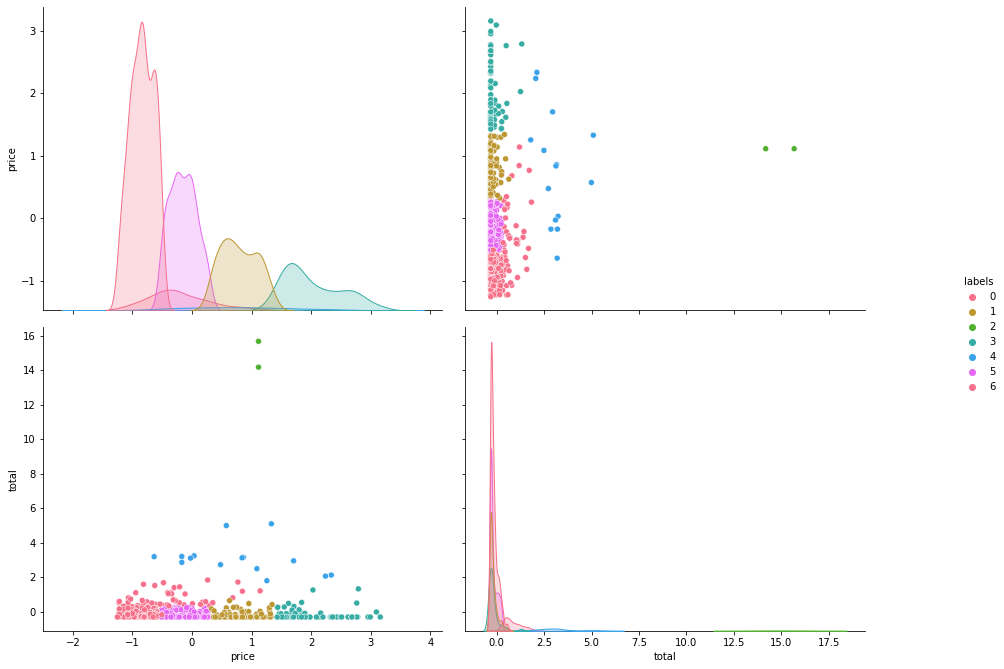

In [38]:
# "price" data are classed as follows
kmeans_plot = sns.pairplot(df_kmeans, hue='labels', palette="husl")
kmeans_plot.fig.set_size_inches(15, 10)

#### Cluster scatter plot with four features

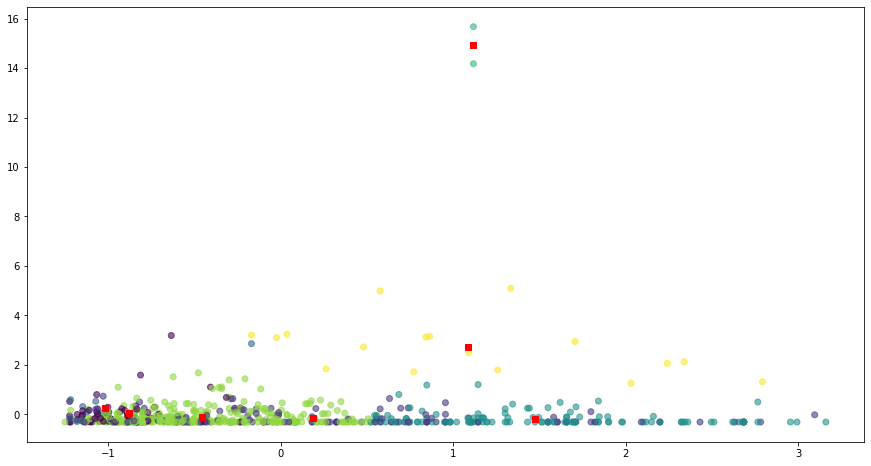

In [39]:
empty1 = no_outlier[['price', 'stock_quantity', 'total', 'stock_status']]
empty1 = pd.DataFrame(scaler.fit_transform(empty1), columns=empty1.columns)

mode1 = KMeans(n_clusters = 7)
mode1.fit(empty1)

mode1.predict(empty1)

df_km = empty1[['price', 'stock_quantity', 'total', 'stock_status']]
df_km['labels'] = mode1.labels_


plt.figure(figsize=(15, 8))
plt.scatter(empty1['price'], empty1['total'], c=mode1.predict(empty1), alpha=0.6)
plt.scatter(mode1.cluster_centers_[:,0], mode1.cluster_centers_[:,2], c='r', marker="s")

With additional features, clusters are created in a different way. For very low price products, the segmentation is not very efficient 3 clusters overlapping each others (very close centroids).

As per following plot, the "stock_quantity" feature seems to give better segmentation while "stock_status" is giving less results (except for a specific cluster that it's discrimanting it well).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


LinAlgError: singular matrix

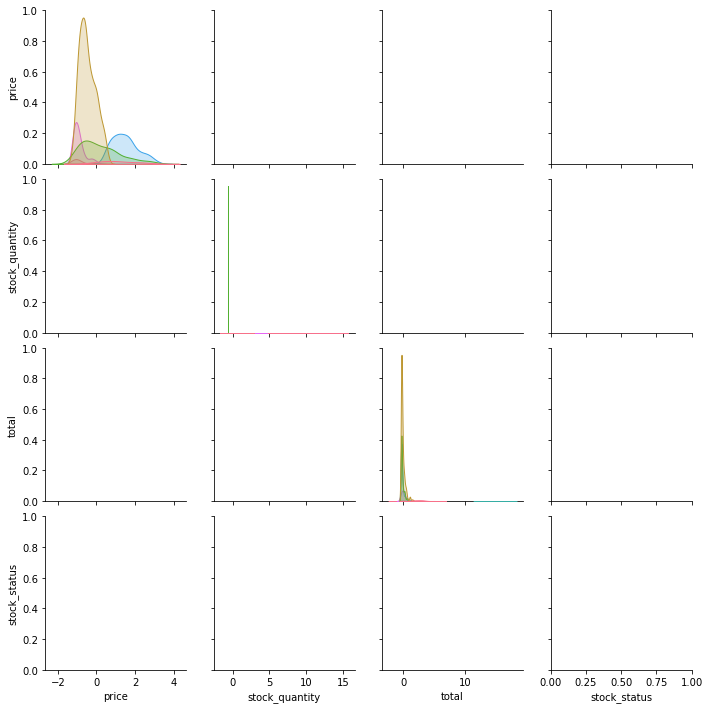

In [50]:
scaler = StandardScaler()
empty = no_outlier[['price', 'stock_quantity', 'total', 'stock_status']]
empty = pd.DataFrame(scaler.fit_transform(empty), columns=empty.columns)

mode = KMeans(n_clusters = 7)
mode.fit(empty)

df_km = empty
df_km['labels'] = mode.labels_

g = sns.pairplot(df_km, hue="labels", palette="husl")
g.fig.set_size_inches(15,15)

### Score de silhouette - Critère de coude - R2

#### Critère de coude

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


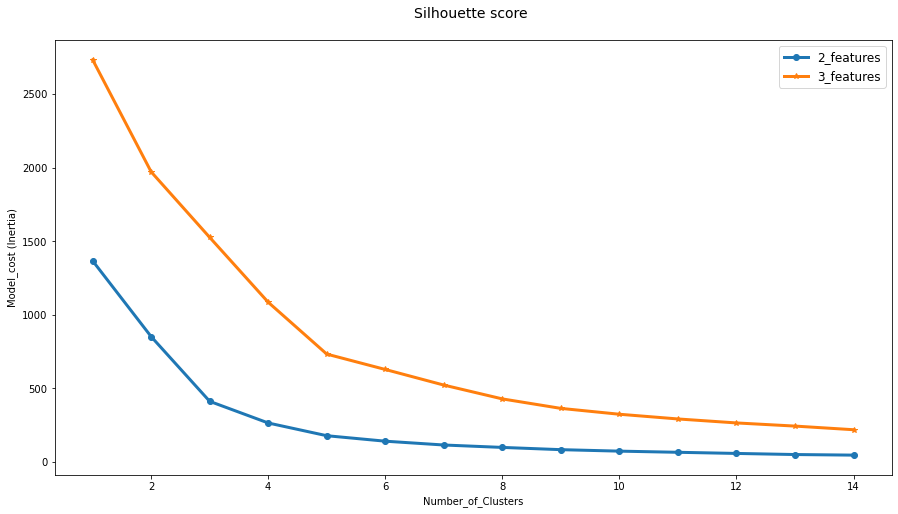

In [42]:
inertia = []
inertia1 = []
K_range = range(1, 15)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_price)
    mode1 = KMeans(n_clusters=k).fit(empty1)
    inertia.append(model.inertia_)
    inertia1.append(mode1.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(K_range, inertia, lw=3, marker='o')
plt.plot(K_range, inertia1, lw=3, marker='*')

plt.xlabel('Number_of_Clusters')
plt.ylabel('Model_cost (Inertia)')
plt.title("Silhouette score \n", fontsize = 14)
plt.legend(["2_features", "3_features"], fontsize = 12)

With Elbow criterion, we observed that:
    - with 2 features, the optimal amount of clusters is between 3 and 5
    - with 3 features, the optimal amount of clusters is between 5 and 7

#### Silhouette plot

In [43]:
from sklearn.metrics import silhouette_score

# Cluster and intra_cluster distance lists
clusters = []
inertia_vals = []
clusters1 = []
inertia_vals1 = []

for k in range(1, 15, 1):
    model_x = KMeans(n_clusters=k)
    model_x.fit(df_price)# append model to cluster list
    clusters.append(model_x)
    inertia_vals.append(model_x.inertia_)
    model_x1 = KMeans(n_clusters=k)
    model_x1.fit(empty1)# append model to cluster list
    clusters1.append(model_x1)
    inertia_vals1.append(model_x1.inertia_)

    
for i in range(1, 14, 1):    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score with 2 features:", silhouette_score(df_price, clusters[i].predict(df_price)))
    print("Silhouette score with 4 features:",silhouette_score(empty1, clusters1[i].predict(empty1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


---------------------------------------
KMeans(n_clusters=2)
Silhouette score with 2 features: 0.5868467861068714
Silhouette score with 4 features: 0.4971466600982601
---------------------------------------
KMeans(n_clusters=3)
Silhouette score with 2 features: 0.5926988407247693
Silhouette score with 4 features: 0.45568527181200813
---------------------------------------
KMeans(n_clusters=4)
Silhouette score with 2 features: 0.6143925709886632
Silhouette score with 4 features: 0.4578388522257477
---------------------------------------
KMeans(n_clusters=5)
Silhouette score with 2 features: 0.4969729526883762
Silhouette score with 4 features: 0.5062012366037879
---------------------------------------
KMeans(n_clusters=6)
Silhouette score with 2 features: 0.4491298130922779
Silhouette score with 4 features: 0.5174432040530221
---------------------------------------
KMeans(n_clusters=7)
Silhouette score with 2 features: 0.4730837875179749
Silhouette score with 4 features: 0.49851204887296

With Silhouette score, we observed that:
 - with 2 features, the optimal amount ofclusters is 4
 - with 3 features, the optimal amount of clusters is 6
 
 Following plots give Silhouette graphs for 2 features study and several amount of ([3, 4, 5, 7]) clusters.

For n_clusters = 3 The average silhouette_score is : 0.5926988407247693
For n_clusters = 4 The average silhouette_score is : 0.6143925709886632
For n_clusters = 5 The average silhouette_score is : 0.5005363333369897
For n_clusters = 7 The average silhouette_score is : 0.46951870495519205


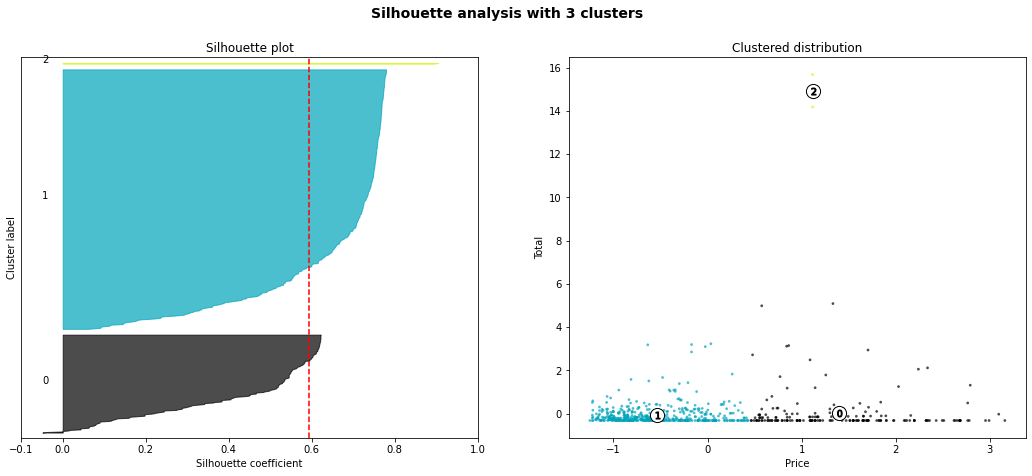

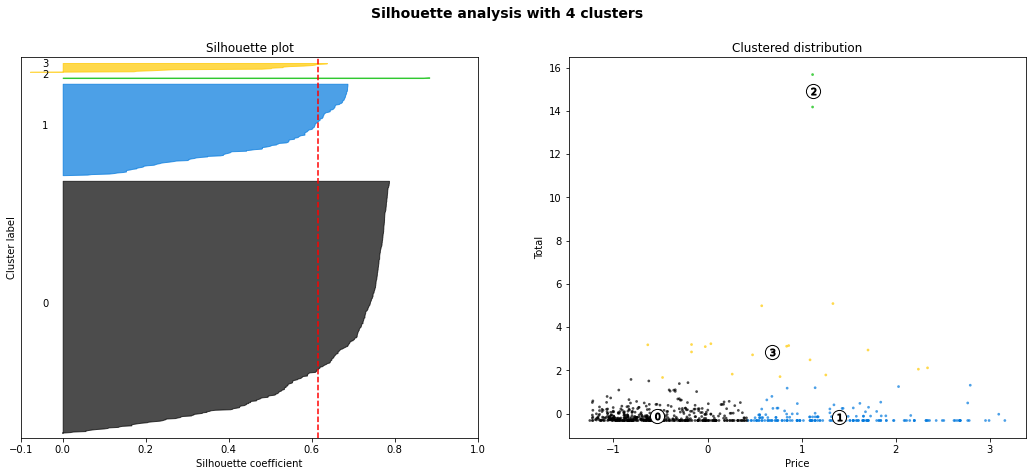

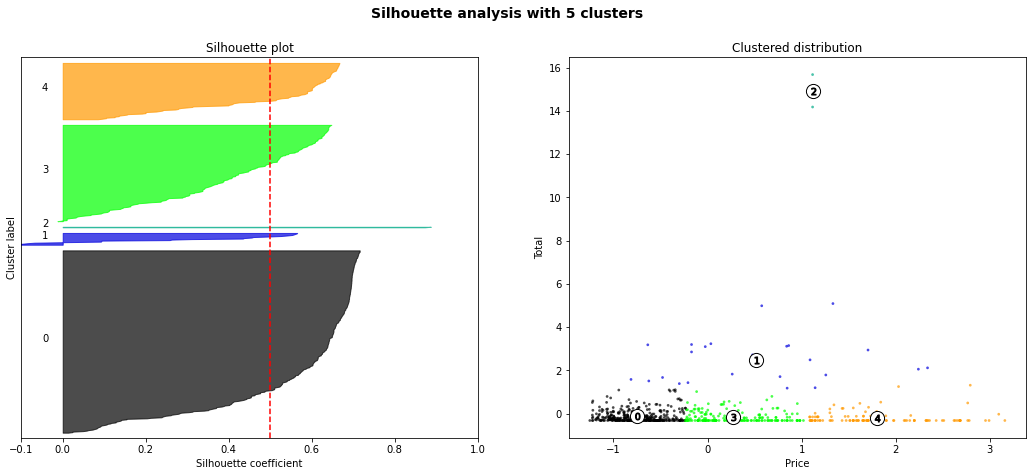

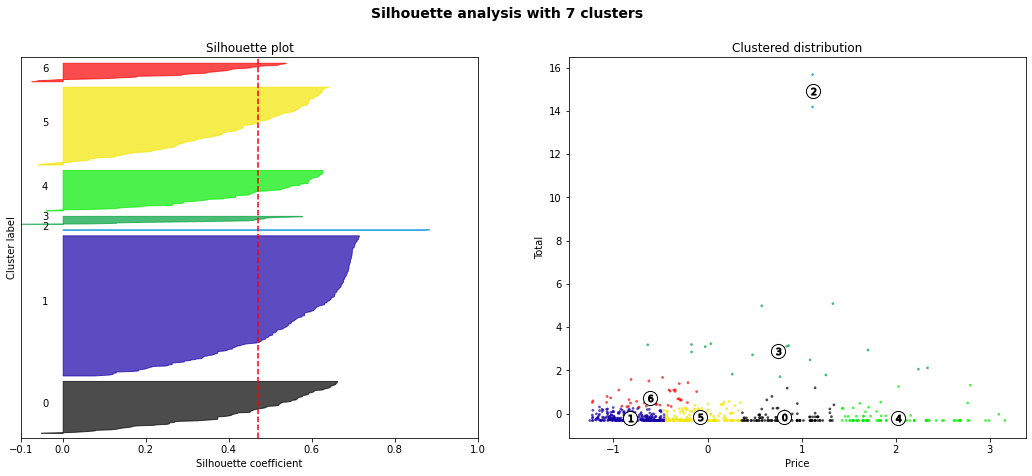

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#print(__doc__)

X = df_price
y = df_price['price']

range_n_clusters = [3, 4, 5, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Silhouette plot with coefficient range of [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 for inserting blank space to demarcate cluster silhouette
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize clusterer with random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['price'], X['total'], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Clustered distribution")
    ax2.set_xlabel("Price")
    ax2.set_ylabel("Total")

    plt.suptitle(("Silhouette analysis with %d clusters" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

#### R2 score

In [45]:
# Intra inertia (distance between centroid and its cluster samples)
model.inertia_

46.04680897721323

In [46]:
inertia

[1366.000000000003,
 850.9769696168992,
 411.3865956567594,
 264.3752949132411,
 177.91835253908792,
 140.7038065318017,
 114.81150925936439,
 98.4325206334772,
 83.16362895240471,
 73.13654828557121,
 65.28283582731898,
 57.52534047105298,
 50.06315300336898,
 46.04680897721323]

#### PCA analysis

In [47]:
from sklearn.decomposition import PCA

df_data = no_outlier[['total_sales', 'price', 'stock_quantity', 'stock_status']]
df_data = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

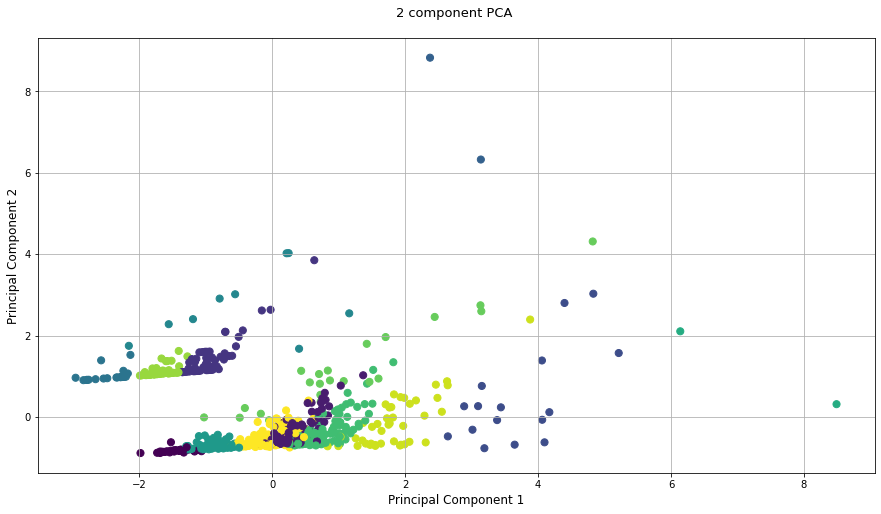

In [53]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA \n', fontsize = 13)

#colors = ['r', 'g', 'b']

ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
           c=mode1.predict(empty1), s = 50)

ax.grid()

In [49]:
pca.explained_variance_ratio_

array([0.41274249, 0.24724459])

The first PC contains 41.27% of the variance and the second PC contains 24.72% of the variance.
Those two components contain together 66% of the information.